### lead categorization into high and low potential
Lead is basically an individaul who might be the customer (business opportunities)but currently isnt
### Data exploration insights – Sales effectiveness.

### Business Case:
FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website. FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

### PROJECT GOAL: 
1. Data exploration insights – Sales effectiveness. 
2. ML model to predict the Lead Category (High Potential , Low Potential)

### Target variable
As per the business problem given i.e to categorize new lead as High or low potential lead. In status we have following categories 1)Open:-lead is open and interaction is going on.

2)Potential:-Lead can be converted into customer.

3)In Progress Positive:-Lead is in process of conversion into customer.

4)Not Responding:- Sales agent has called the lead but he/she is not responding.

5)Just Enquiry:-The person is not interested in buying the product now.

6)Junk Lead:-Leads who arent qualified to purchase products are called as junk leads.

7)CONVERTED:-Lead has been converted into customer.

8)In Progress Negative:-Earlier lead was interested to buy the product but now not interested.

9)LOST:-The lead is lost.

10)Long Term:-leads that are within a one or two sales cycle time frame of closing.

In [1]:
## import necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## loading the data to dataframe

data=pd.read_csv('Project_sales.csv')
data.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


### feature explanation
1)Created:- Date when lead was created.

2)Product_ID:-Unique id for each product which company is selling.

3)Source:-From where the lead was generated.

4)Mobile:-Contact info of lead.

5)Email:-Contact info of lead.

6)Sales_Agent:-Agent who has created the lead or working on the lead.

7)LOcation:-Lead location.

8)Delivery_mode:-Mode via which lead has requested the product.

9)Status:-Current status of lead.

In [3]:
## deleting the columns not required
del_list=['Unnamed: 0','Created','Mobile','EMAIL'] 
data.drop(del_list,inplace=True,axis=1)

In [4]:
data.shape

(7422, 6)

In [5]:
## Analysing products
data.Product_ID.value_counts()

18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

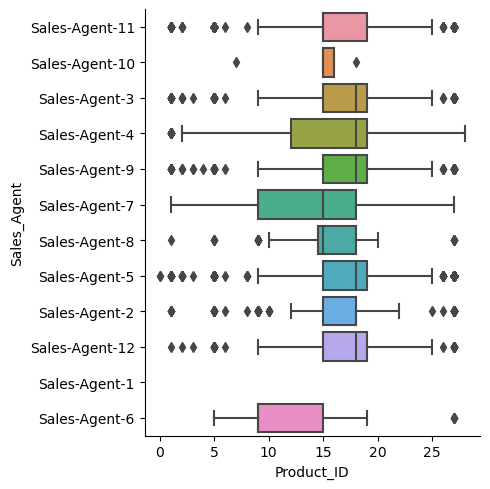

In [6]:
sns.catplot(x='Product_ID',y='Sales_Agent',data=data,kind='box')

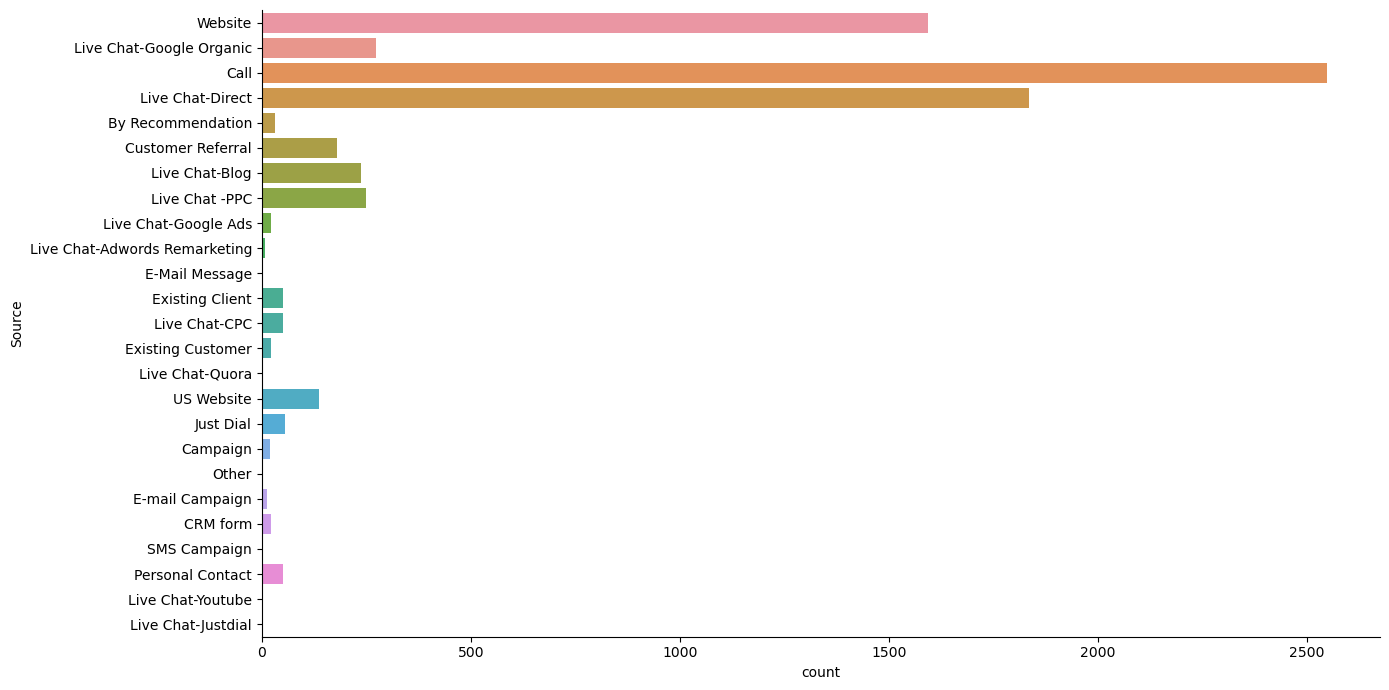

In [7]:
## Analysing the Source of lead
sns.catplot(y='Source',data=data,kind='count',height=7,aspect=2)

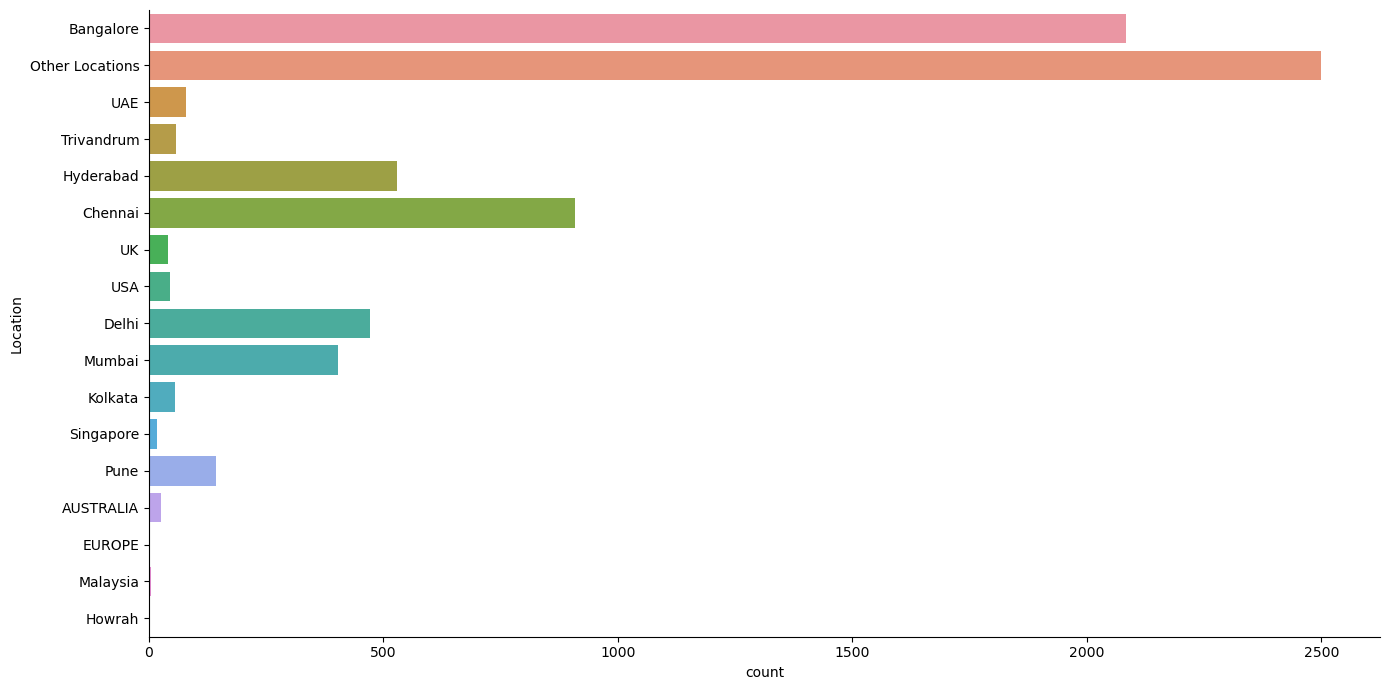

In [8]:
## Location
sns.catplot(y='Location',data=data,kind='count',height=7,aspect=2)

In [9]:
pd.crosstab(data.Product_ID,data.Status,margins='all')

Status,CONVERTED,In Progress Negative,In Progress Positive,Junk Lead,Just Enquiry,LOST,Long Term,Not Responding,Open,Potential,converted,All
Product_ID,,,,,,,,,,,,
0.0,0,0,0,0,1,1,0,0,0,0,0,2
1.0,0,10,8,22,18,6,5,29,1,6,0,105
2.0,1,3,3,7,3,2,5,9,0,5,0,38
3.0,0,2,2,0,0,1,2,0,0,0,0,7
4.0,0,0,0,0,1,0,0,0,0,0,0,1
5.0,51,54,33,94,79,26,35,76,4,34,1,487
6.0,0,0,1,1,0,3,1,0,0,1,0,7
7.0,0,0,0,1,0,0,0,0,0,0,0,1
8.0,0,1,0,2,2,0,1,0,0,0,0,6


In [10]:
pd.crosstab(data.Source,data.Status,margins='all')

Status,CONVERTED,In Progress Negative,In Progress Positive,Junk Lead,Just Enquiry,LOST,Long Term,Not Responding,Open,Potential,converted,All
Source,,,,,,,,,,,,
By Recommendation,18,0,1,0,0,1,4,2,1,5,0,32
CRM form,3,5,0,3,2,3,0,3,0,4,0,23
Call,240,200,213,730,217,159,215,308,16,248,1,2547
Campaign,4,0,0,4,0,1,2,6,0,2,0,19
Customer Referral,118,4,15,4,4,2,5,5,0,21,2,180
E-Mail Message,0,0,0,0,0,0,0,0,0,1,0,1
E-mail Campaign,4,2,0,0,0,2,1,3,0,0,0,12
Existing Client,35,0,2,2,1,0,2,0,0,9,0,51
Existing Customer,13,1,2,0,0,1,2,0,0,3,0,22


In [11]:
pd.crosstab(data.Location,data.Status,margins='all')

Status,CONVERTED,In Progress Negative,In Progress Positive,Junk Lead,Just Enquiry,LOST,Long Term,Not Responding,Open,Potential,converted,All
Location,,,,,,,,,,,,
AUSTRALIA,5,0,3,3,6,1,0,5,0,2,0,25
Bangalore,464,159,252,282,95,127,311,150,2,236,6,2084
Chennai,108,85,105,115,91,57,91,100,1,150,6,909
Delhi,40,75,33,78,64,36,46,53,0,46,0,471
EUROPE,0,0,1,0,0,0,0,0,0,2,0,3
Howrah,0,0,0,1,0,0,0,0,0,0,0,1
Hyderabad,54,62,51,76,69,45,49,70,0,51,1,528
Kolkata,2,10,3,15,9,2,3,6,0,5,0,55
Malaysia,3,0,1,0,0,0,0,0,0,0,0,4


In [12]:
pd.crosstab(data.Status,data.Sales_Agent,margins='all')

Sales_Agent,Sales-Agent-1,Sales-Agent-10,Sales-Agent-11,Sales-Agent-12,Sales-Agent-2,Sales-Agent-3,Sales-Agent-4,Sales-Agent-5,Sales-Agent-6,Sales-Agent-7,Sales-Agent-8,Sales-Agent-9,All
Status,,,,,,,,,,,,,
CONVERTED,0,0,118,82,61,122,131,77,37,88,2,116,834
In Progress Negative,0,0,119,51,59,81,91,107,25,64,1,28,626
In Progress Positive,0,0,8,0,0,36,198,3,0,130,4,264,643
Junk Lead,0,5,299,79,94,195,303,318,17,142,11,73,1536
Just Enquiry,0,0,219,0,1,69,193,158,0,52,9,55,756
LOST,0,0,40,57,45,47,73,106,11,47,0,14,440
Long Term,0,0,120,0,111,80,73,92,23,76,2,69,646
Not Responding,0,0,246,0,17,109,293,189,1,112,8,151,1126
Open,4,44,1,0,0,1,0,1,0,0,17,0,68


### Feature Engineering
#### Handling the missing data
##### No analysis can be made on open leads as product id and location are missing
##### SO replacing nan product _id, location,sales_Agent,source by mode

In [13]:
data.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [14]:
## dropping the rows where product id is null as no analysis can be done
data=data.loc[data['Product_ID'].isnull()==False]

In [15]:
data.isnull().sum()

Product_ID        0
Source            7
Sales_Agent      23
Location          6
Delivery_Mode     0
Status            0
dtype: int64

In [16]:
## imputing missing values by mode
from statistics import mode
print(mode(data.Source))
print(mode(data.Sales_Agent))
print(mode(data.Location))

Call
Sales-Agent-4
Other Locations


In [17]:
data.loc[data['Source'].isnull()==True,'Source']='Call'
data.loc[data['Sales_Agent'].isnull()==True,'Sales_Agent']='Sales-Agent-4'
data.loc[data['Location'].isnull()==True,'Location']='Other Locations'

In [18]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

### Encoding the categorical features

In [19]:
data=data.loc[(data['Status'] !='converted')]

In [20]:
data=data.loc[(data['Status'] !='LOST')]

In [21]:
data.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'Long Term'], dtype=object)

In [22]:
data.loc[(data['Status']=='Not Responding'),'Status']=0
data.loc[(data['Status']=='Potential'),'Status']=1
data.loc[(data['Status']=='In Progress Positive'),'Status']=1
data.loc[(data['Status']=='Just Enquiry'),'Status']=0
data.loc[(data['Status']=='Junk Lead'),'Status']=0
data.loc[(data['Status']=='In Progress Negative'),'Status']=1
data.loc[(data['Status']=='Open'),'Status']=1
data.loc[(data['Status']=='CONVERTED'),'Status']=1
data.loc[(data['Status']=='Long Term'),'Status']=1

In [23]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,1
19,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,1
24,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,1
25,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,0
26,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,1


In [24]:
## Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
ec=LabelEncoder()
data['Source']=ec.fit_transform(data['Source'])
data['Sales_Agent']=ec.fit_transform(data['Sales_Agent'])
data['Location']=ec.fit_transform(data['Location'])
data['Delivery_Mode']=ec.fit_transform(data['Delivery_Mode'])

In [25]:
data['Status']=data.Status.astype('int32')

In [26]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9.0,16,4,1,0,1
19,19.0,2,5,10,4,1
24,18.0,24,1,13,0,1
25,15.0,24,8,6,0,0
26,18.0,2,8,1,0,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6906 entries, 18 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     6906 non-null   float64
 1   Source         6906 non-null   int32  
 2   Sales_Agent    6906 non-null   int32  
 3   Location       6906 non-null   int32  
 4   Delivery_Mode  6906 non-null   int32  
 5   Status         6906 non-null   int32  
dtypes: float64(1), int32(5)
memory usage: 242.8 KB


In [28]:
data.to_csv('cleaned.csv')

### Feature Selection

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
## cerating x and y variables
X=data.iloc[:,0:5]
y=data.Status

In [31]:
##apply selectkbest class to extract top 10 best features
bestfeatures=SelectKBest(score_func=chi2,k=5)
fit=bestfeatures.fit(X,y)

In [32]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [33]:
## concatinating 2 df for better visulaization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['specs','score']

In [34]:
featureScores

,specs,score
0,Product_ID,96.357105
1,Source,35.451506
2,Sales_Agent,99.876699
3,Location,2594.618636
4,Delivery_Mode,721.380168


In [35]:
print(featureScores.nlargest(10,'score'))

           specs        score
3       Location  2594.618636
4  Delivery_Mode   721.380168
2    Sales_Agent    99.876699
0     Product_ID    96.357105
1         Source    35.451506


In [36]:
## feature importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [37]:
print(model.feature_importances_)

[0.27718995 0.16172917 0.17879858 0.27236687 0.10991543]


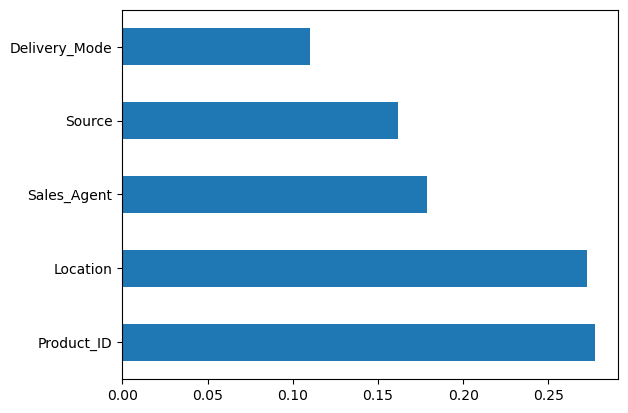

In [38]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.25, random_state=42)

In [40]:
X_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
7280,25.0,2,10,10,4
6540,18.0,24,4,1,0
7338,15.0,24,1,10,0
6414,27.0,21,6,1,4
7415,21.0,14,5,1,0
...,...,...,...,...,...
3957,19.0,24,5,9,2
5476,15.0,2,1,10,4
5516,27.0,2,4,1,0
5694,9.0,9,4,1,0


In [41]:
X_test

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
2555,19.0,24,6,9,2
1041,27.0,24,8,2,2
4106,9.0,14,5,14,3
6034,19.0,14,2,1,0
5788,18.0,2,1,6,0
...,...,...,...,...,...
3595,15.0,2,6,10,4
3721,27.0,2,6,2,2
663,19.0,14,8,10,2
91,15.0,2,10,10,4


In [42]:
y_train

7280    1
6540    0
7338    1
6414    1
7415    1
       ..
3957    1
5476    0
5516    1
5694    0
905     0
Name: Status, Length: 5179, dtype: int32

In [43]:
y_test

2555    0
1041    0
4106    0
6034    1
5788    0
       ..
3595    0
3721    1
663     1
91      0
934     1
Name: Status, Length: 1727, dtype: int32

In [44]:
X

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
18,9.0,16,4,1,0
19,19.0,2,5,10,4
24,18.0,24,1,13,0
25,15.0,24,8,6,0
26,18.0,2,8,1,0
...,...,...,...,...,...
7415,21.0,14,5,1,0
7416,19.0,14,10,10,2
7419,5.0,14,1,1,0
7420,21.0,1,5,10,0


In [45]:
y

18      1
19      1
24      1
25      0
26      1
       ..
7415    1
7416    0
7419    0
7420    0
7421    1
Name: Status, Length: 6906, dtype: int32

In [46]:
y.unique()

array([1, 0])

In [47]:
y.value_counts()

1    3488
0    3418
Name: Status, dtype: int64

### Checking the balance of both class

In [48]:
data.Status.value_counts()

1    3488
0    3418
Name: Status, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_res1,y_res1 = smt.fit_resample(X_train, y_train)

In [50]:
#from imblearn.over_sampling import SMOTE
#smk = SMOTE(random_state=42)
#X_res1,y_res1=smk.fit(X_train,y_train)

In [51]:
#from imblearn.combine import SMOTETomek
#smk = SMOTETomek(random_state=42)
#X_res1,y_res1=smk.fit_sample(X_train,y_train)

In [52]:
X_res1.shape,y_res1.shape

((5186, 5), (5186,))

In [53]:
X_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
7280,25.0,2,10,10,4
6540,18.0,24,4,1,0
7338,15.0,24,1,10,0
6414,27.0,21,6,1,4
7415,21.0,14,5,1,0
...,...,...,...,...,...
3957,19.0,24,5,9,2
5476,15.0,2,1,10,4
5516,27.0,2,4,1,0
5694,9.0,9,4,1,0


In [54]:
data.Status.value_counts()

1    3488
0    3418
Name: Status, dtype: int64

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
LR=LogisticRegression()
model=LR.fit(X_res1,y_res1)
y_predict=model.predict(X_test)
score=roc_auc_score(y_test,y_predict)
score

0.6820947034808766

In [56]:


cm=pd.crosstab(y_test,y_predict)
cm

col_0,0,1
Status,,
0,554,278
1,270,625


### DecisionTree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
## training and test data
X=data.loc[:,['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode']]
y=data.Status

In [59]:
kf=RepeatedKFold(n_splits=5,random_state=None)

In [60]:
for train_index,test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      

Train: [   0    2    4 ... 6903 6904 6905] Validation: [   1    3    9 ... 6880 6884 6887]
Train: [   1    2    3 ... 6901 6903 6904] Validation: [   0    7    8 ... 6900 6902 6905]
Train: [   0    1    2 ... 6902 6903 6905] Validation: [   5    6   15 ... 6893 6895 6904]
Train: [   0    1    2 ... 6902 6904 6905] Validation: [  11   12   13 ... 6897 6901 6903]
Train: [   0    1    3 ... 6903 6904 6905] Validation: [   2    4   23 ... 6890 6894 6896]
Train: [   0    1    2 ... 6902 6904 6905] Validation: [  14   16   17 ... 6887 6888 6903]
Train: [   0    1    2 ... 6903 6904 6905] Validation: [   5    8   21 ... 6894 6897 6901]
Train: [   3    4    5 ... 6903 6904 6905] Validation: [   0    1    2 ... 6893 6896 6898]
Train: [   0    1    2 ... 6900 6901 6903] Validation: [   3    6    9 ... 6902 6904 6905]
Train: [   0    1    2 ... 6903 6904 6905] Validation: [   4    7   11 ... 6890 6895 6900]
Train: [   0    1    2 ... 6903 6904 6905] Validation: [   6    9   22 ... 6897 6898 6899]

In [61]:
model=DecisionTreeClassifier(max_leaf_nodes=2,random_state=42)
model.fit(X_res1,y_res1)

DecisionTreeClassifier(max_leaf_nodes=2, random_state=42)

In [62]:
X_test

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
24,18.0,24,1,13,0
29,19.0,14,5,15,1
32,27.0,14,1,6,2
37,18.0,16,10,1,0
45,15.0,2,1,10,4
...,...,...,...,...,...
7387,21.0,1,1,1,0
7392,20.0,7,2,1,3
7400,20.0,2,1,1,0
7412,18.0,9,4,1,0


In [63]:
y_predict=model.predict(X_test)
score=roc_auc_score(y_test,y_predict)
score

0.6789865924975039

In [64]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_res1,y_res1)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [65]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=94, random_state=42)

In [66]:
model1=DecisionTreeClassifier(max_leaf_nodes=94,random_state=42)
model1.fit(X_res1,y_res1)

DecisionTreeClassifier(max_leaf_nodes=94, random_state=42)

In [67]:
y_predict=model1.predict(X_test)
score=roc_auc_score(y_test,y_predict)
score

0.7189322241519628

### RandomForestClassifier Model

In [68]:
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(n_estimators=10)

model2.fit(X_res1,y_res1)

RandomForestClassifier(n_estimators=10)

In [69]:
y_predict=model2.predict(X_test)
score=roc_auc_score(y_test,y_predict)
score

0.821066894879475

In [70]:
## hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [71]:
est=RandomForestClassifier(n_jobs=-1)
param_distributions={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,4),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [72]:
random=RandomizedSearchCV(estimator=est,param_distributions=param_distributions,cv=3,n_jobs=-1)

In [73]:
model_random=random.fit(X_train,y_train)

In [74]:
print('Best: %f using %s' % (model_random.best_score_,model_random.best_params_))

Best: 0.698462 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 200}


In [75]:
model3=RandomForestClassifier(bootstrap=True, criterion='gini',
                              max_depth= 10, max_features=2, 
                              min_samples_leaf= 3,n_estimators= 200)

model3.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=3,
                       n_estimators=200)

In [76]:
model3.score(X_train,y_train)

0.779366515837104

### AdaBoost Classifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=200,learning_rate=1)
abc.fit(X_res1,y_res1)
y_predict=abc.predict(X_test)
score=roc_auc_score(y_test,y_predict)
score

0.7119904016377625

In [78]:
## using base learner as svm
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
abc1 =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
abc1.fit(X_res1,y_res1)
y_predict=abc1.predict(X_test)
score=roc_auc_score(y_test,y_predict)
score

0.581275642477787

### Extreme Gradient Boosting

In [80]:
import xgboost as xgb

In [81]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [82]:
xg_reg.fit(X_res1,y_res1)

preds = xg_reg.predict(X_test)

In [83]:
roc=roc_auc_score(y_test,preds)
roc

0.688066861318768

In [84]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics='auc', as_pandas=True, seed=123)

In [85]:
cv_results.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.709846,0.004868,0.706006,0.012981
1,0.748805,0.011392,0.734322,0.014683
2,0.756504,0.009966,0.743840,0.012312
3,0.759693,0.012676,0.746853,0.014972
4,0.756640,0.009938,0.745006,0.012596


In [86]:
print((cv_results["test-auc-mean"]).tail(1))

49    0.774337
Name: test-auc-mean, dtype: float64


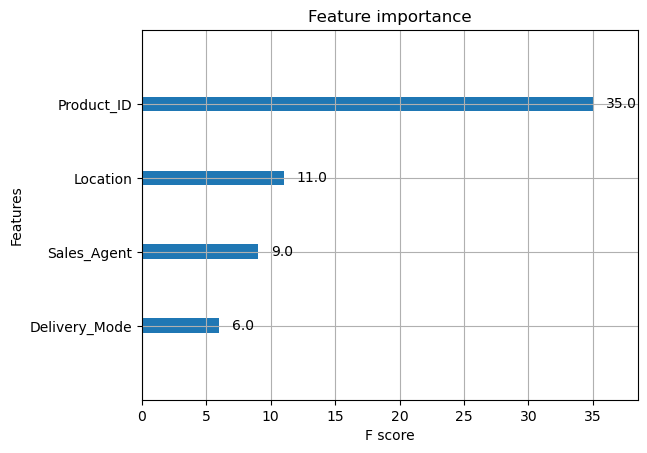

In [87]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [89]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), XGBClassifier(), AdaBoostClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'XGBClassifier', 'AdaBoostClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_res1,y_res1)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.6821144098479363
RandomForsetClassifier
0.8254887762490949
DecisionTreeClassifier
0.8218682114409848
KNeighborsClassifier
0.7472845763939174
XGBClassifier
0.782766111513396
AdaBoostClassifier
0.7161477190441708


<AxesSubplot:>

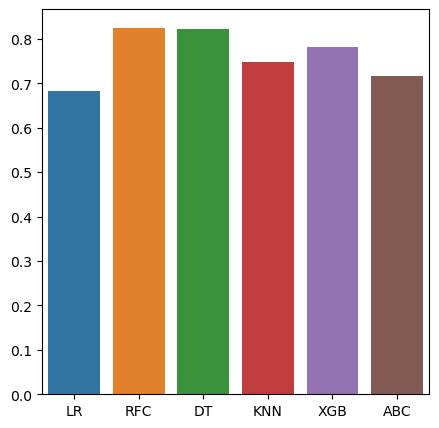

In [91]:
sns.barplot(x= ['LR','RFC','DT','KNN','XGB','ABC'],y=accuracy_scores)

#### Random Forest and Decision Tree Classifier gave an accuracy of 82%.

The project is completed with the purpose of finding out the lead quality. The company's motive is to invest in the right prospects. We divided the Lead as 'High Potential=0 , Low Potential=1' . The result in increasing of accuracy drastically change when XGBoost Classifier is used.